**## Credit Card Fraud Detection**

## Content
### The dataset contains transactions made by credit cards in September 2013 by European cardholders.
### This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

### It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-sensitive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

### Given the class imbalance ratio, we recommend measuring the accuracy using the Area Under the Precision-Recall Curve (AUPRC). Confusion matrix accuracy is not meaningful for unbalanced classification.

**1.Importing the libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from sklearn.metrics import classification_report,accuracy_score

In [ ]:
from sklearn.ensemble import IsolationForest
from sklearn.svm import OneClassSVM

**2.Reading the dataset**

In [ ]:
df = pd.read_csv("creditcard.csv")

In [ ]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


**3.Data Analysis**

In [ ]:
df.shape

(8766, 31)

**4.Check the Null Values**

In [ ]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    1
Class     1
dtype: int64

As you can see that V16 upto V28 columns has Null values so we remove it

In [ ]:
df = df.dropna()

In [ ]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

**5.Checking the distribution of the normal fraud cases in our dataset**

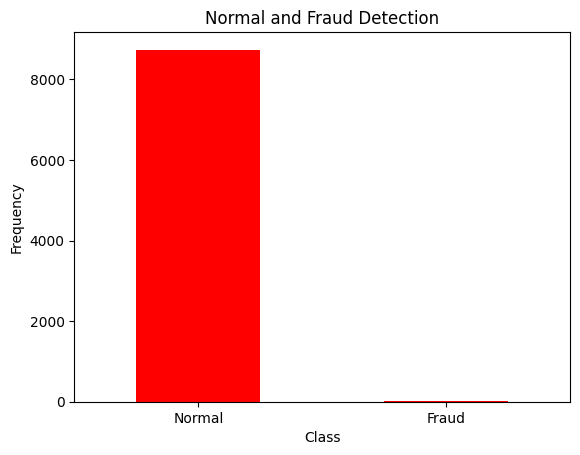

In [ ]:
fraud_check = pd.value_counts(df['Class'],sort = True)
fraud_check.plot(kind = 'bar',rot=0, color='r')
plt.title("Normal and Fraud Detection")
plt.xlabel("Class")
plt.ylabel("Frequency")
labels=['Normal','Fraud']
plt.xticks(range(2), labels)
plt.show()

In [ ]:
fraud_people = df[df['Class']==1]
normal_people = df[df['Class']==0]

In [ ]:
fraud_people.shape

(30, 31)

In [ ]:
normal_people.shape

(8735, 31)

**6.Finding out the average of the both the datasets**

In [ ]:
fraud_people['Amount'].describe()

count      30.000000
mean       88.757000
std       341.372542
min         0.000000
25%         1.000000
50%         1.000000
75%         1.000000
max      1809.680000
Name: Amount, dtype: float64

In [ ]:
normal_people['Amount'].describe()

count    8735.000000
mean       63.703021
std       189.290575
min         0.000000
25%         5.000000
50%        15.950000
75%        52.520000
max      7712.430000
Name: Amount, dtype: float64

Let us analyse it visually

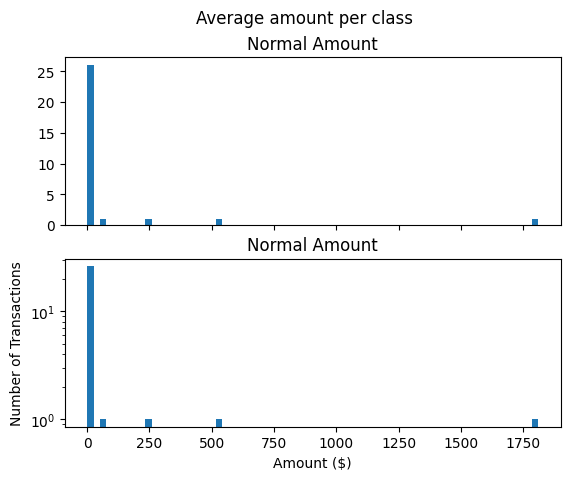

In [ ]:
graph, (plot1,plot2) = plt.subplots(2,1,sharex = True)
graph.suptitle('Average amount per class')
bins=70

plot1.hist(fraud_people['Amount'], bins = bins)
plot1.set_title('Normal Amount')

plot2.hist(fraud_people['Amount'], bins = bins)
plot2.set_title('Normal Amount')

plt.xlabel('Amount ($)')
plt.ylabel('Number of Transactions')
plt.yscale('log')
plt.show();

**7.Plotting the Heatmap**

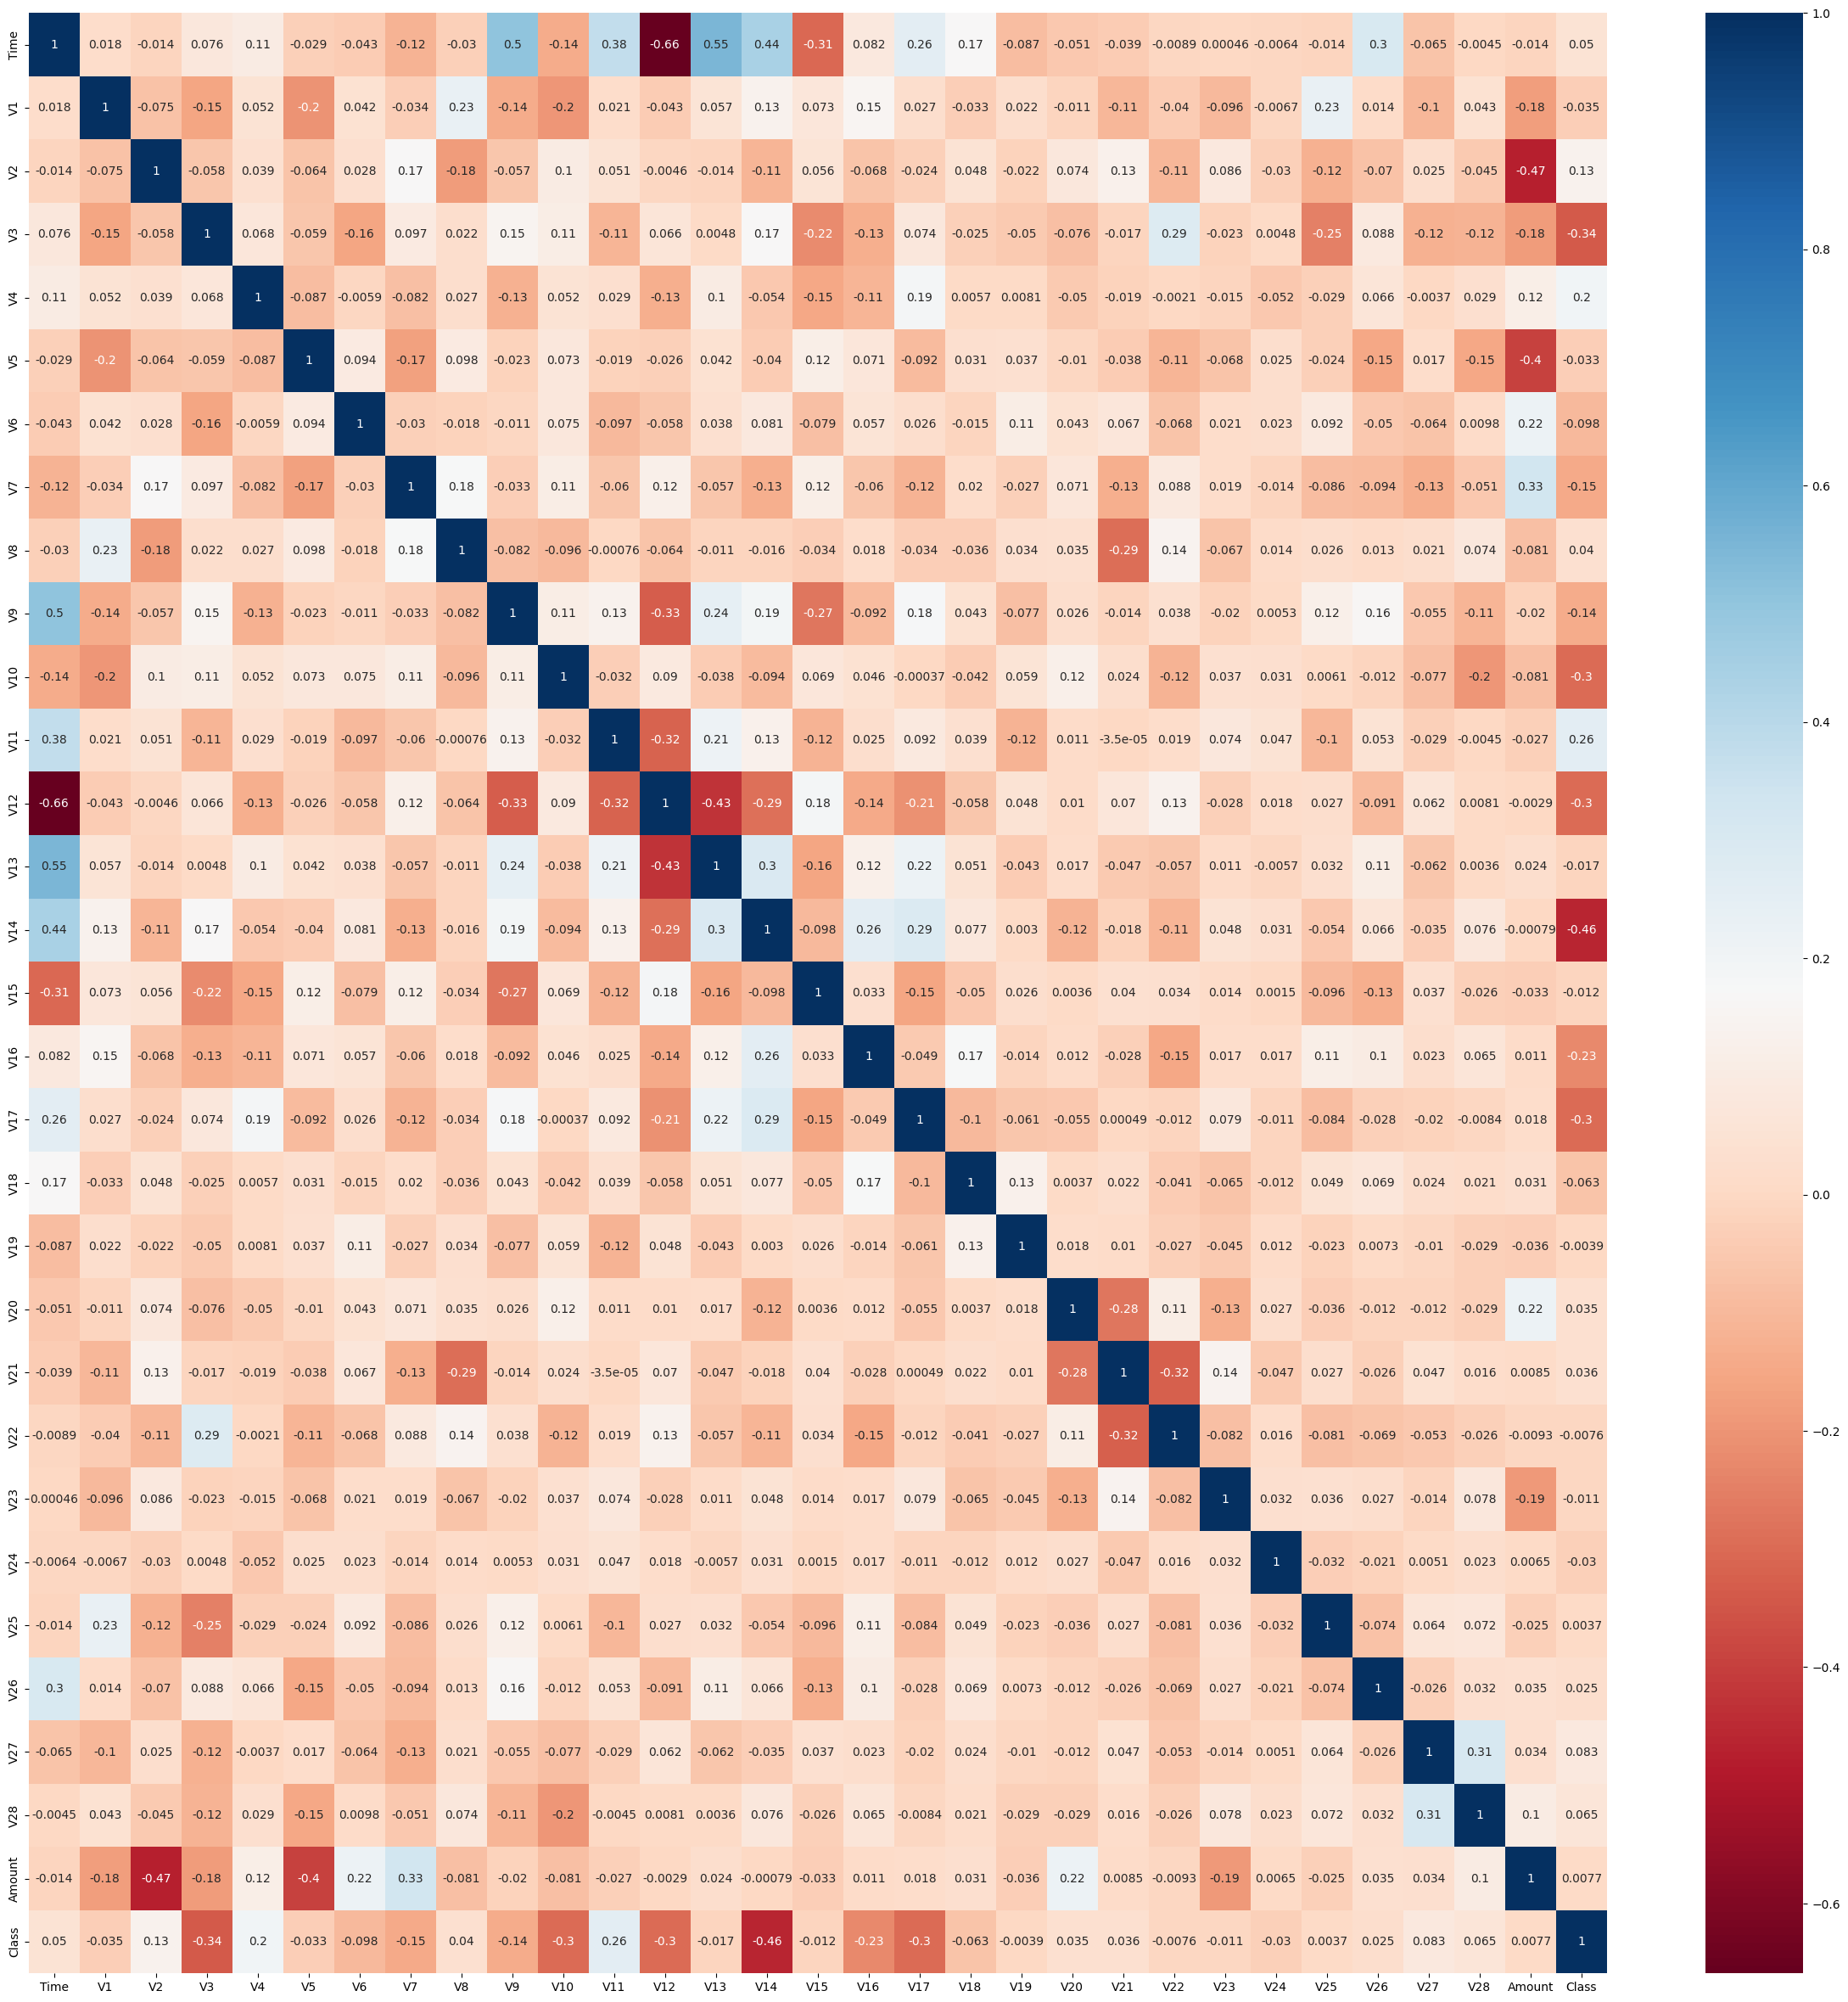

In [ ]:
df.corr()
plt.figure(figsize=(30,30))
g=sns.heatmap(df.corr(),annot=True,cmap='RdBu')

**8.Converting the Dependent and Independent Features**

In [ ]:
columns = df.columns.tolist()
columns = [var for var in columns if var not in ['Class']]
target = "Class"
x = df[columns]
y=df[target]

In [ ]:
x.shape

(8765, 30)

In [ ]:
y.shape

(8765,)

In [ ]:
x.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99


In [ ]:
y.head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: Class, dtype: float64

**9.Model Building**

Splitting the dataset

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.30,random_state=42)

## Isolation Forest

#### One of the newest techniques to detect anomalies is called Isolation Forests. The algorithm is based on the fact that anomalies are data points that are few and different. As a result of these properties, anomalies are susceptible to a mechanism called isolation.

#### This method is highly useful and is fundamentally different from all existing methods. It introduces the use of isolation as a more effective and efficient means to detect anomalies than the commonly used basic distance and density measures. Moreover, this method is an algorithm with a low linear time complexity and a small memory requirement. It builds a good performing model with a small number of trees using small sub-samples of fixed size, regardless of the size of a data set.

#### Typical machine learning methods tend to work better when the patterns they try to learn are balanced, meaning the same amount of good and bad behaviors are present in the dataset.

#### How Isolation Forests Work The Isolation Forest algorithm isolates observations by randomly selecting a feature and then randomly selecting a split value between the maximum and minimum values of the selected feature. The logic argument goes: isolating anomaly observations is easier because only a few conditions are needed to separate those cases from the normal observations. On the other hand, isolating normal observations require more conditions. Therefore, an anomaly score can be calculated as the number of conditions required to separate a given observation.

#### The way that the algorithm constructs the separation is by first creating isolation trees, or random decision trees. Then, the score is calculated as the path length to isolate the observation

In [ ]:
iso_forest = IsolationForest(n_estimators=100, max_samples=len(x_train),random_state=0, verbose=0)

In [ ]:
iso_forest.fit(x_train,y_train)

IsolationForest(max_samples=6135, random_state=0)

In [ ]:
ypred = iso_forest.predict(x_test)

In [ ]:
ypred

array([ 1,  1,  1, ...,  1,  1, -1])

Mapping the values as we want to have an output in 0 or 1

In [ ]:
ypred[ypred == 1] = 0
ypred[ypred == 1] = 1

Accuracy score and matrix

In [ ]:
print(accuracy_score(y_test,ypred))

0.988212927756654


In [ ]:
print(accuracy_score(y_test,ypred)*100,'%')

98.8212927756654 %


In [ ]:
print(classification_report(y_test,ypred))

              precision    recall  f1-score   support

        -1.0       0.00      0.00      0.00         0
         0.0       1.00      0.99      1.00      2620
         1.0       0.00      0.00      0.00        10

    accuracy                           0.99      2630
   macro avg       0.33      0.33      0.33      2630
weighted avg       1.00      0.99      0.99      2630



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
confusion_matrix(y_test,ypred)

array([[   0,    0,    0],
       [  21, 2599,    0],
       [   8,    2,    0]])

In [ ]:
n_errors = (ypred != y_test).sum()
print("Isolation Forest have {} errors,".format(n_errors))

Isolation Forest have 31 errors,


OneClassSVM

In [ ]:
svm = OneClassSVM(kernel='rbf',degree=3, gamma=0.1,nu=0.05)

In [ ]:
svm.fit(x_train,y_train)

OneClassSVM(gamma=0.1, nu=0.05)

In [ ]:
ypred1 = svm.predict(x_test)

In [ ]:
ypred1[ypred1 == 1] = 0
ypred1[ypred == 1] = 1

In [ ]:
print(accuracy_score(y_test,ypred))

0.988212927756654


In [ ]:
print(accuracy_score(y_test,ypred)*100,'%')

98.8212927756654 %


In [ ]:
print(classification_report(y_test,ypred))

              precision    recall  f1-score   support

        -1.0       0.00      0.00      0.00         0
         0.0       1.00      0.99      1.00      2620
         1.0       0.00      0.00      0.00        10

    accuracy                           0.99      2630
   macro avg       0.33      0.33      0.33      2630
weighted avg       1.00      0.99      0.99      2630



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

In [ ]:
pip install pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 484.4/484.4 kB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.4/153.4 kB 11.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.5/212.5 kB 17.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 9.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 10.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.4/73.4 kB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 71.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 4.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 80.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 77.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.4/10.4 MB 99.0 MB/s eta 0:0

**PyCaret**

In [ ]:
from pycaret.classification import *

In [ ]:
model= setup(data= df, target= 'Class')

,Description,Value
0,Session id,4216
1,Target,Class
2,Target type,Binary
3,Original data shape,"(8765, 31)"
4,Transformed data shape,"(8765, 31)"
5,Transformed train set shape,"(6135, 31)"
6,Transformed test set shape,"(2630, 31)"
7,Numeric features,30
8,Preprocess,True
9,Imputation type,simple


In [ ]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.9995,0.9573,0.9000,0.9750,0.9190,0.9188,0.9278,1.2040
lda,Linear Discriminant Analysis,0.9995,1.0000,0.8500,1.0000,0.9000,0.8998,0.9120,0.2060
ridge,Ridge Classifier,0.9993,0.0000,0.8000,1.0000,0.8667,0.8664,0.8826,0.0620
rf,Random Forest Classifier,0.9993,1.0000,0.8500,0.9750,0.8857,0.8854,0.8985,1.2850
ada,Ada Boost Classifier,0.9993,0.9817,0.8500,0.9750,0.8857,0.8854,0.8985,1.4980
et,Extra Trees Classifier,0.9993,1.0000,0.8500,0.9750,0.8857,0.8854,0.8985,1.2050
xgboost,Extreme Gradient Boosting,0.9993,0.9998,0.8500,0.9750,0.8857,0.8854,0.8985,0.9880
dt,Decision Tree Classifier,0.9989,0.9247,0.8500,0.8917,0.8324,0.8319,0.8507,0.0990
gbc,Gradient Boosting Classifier,0.9989,0.9498,0.8500,0.8917,0.8324,0.8319,0.8507,4.4380
lightgbm,Light Gradient Boosting Machine,0.9987,0.9984,0.8500,0.8417,0.8157,0.8151,0.8299,0.8300


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=4216, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
random_forest=create_model('rf')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,0.9984,1.0000,0.5000,1.0000,0.6667,0.6659,0.7065
3,0.9984,1.0000,0.5000,1.0000,0.6667,0.6659,0.7065
4,0.9984,1.0000,1.0000,0.7500,0.8571,0.8563,0.8653
5,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,0.9984,1.0000,0.5000,1.0000,0.6667,0.6659,0.7065
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
random_forest

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=100, n_jobs=-1, oob_score=False,
                       random_state=4216, verbose=0, warm_start=False)

In [ ]:
pred_holdout= predict_model(random_forest, data=x_test)

In [ ]:
pred_holdout

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V22,V23,V24,V25,V26,V27,V28,Amount,prediction_label,prediction_score
1226,946,0.873711,-0.550796,0.318133,0.997659,-0.788132,-0.663064,0.188044,-0.154245,0.526175,...,-0.628158,-0.144690,0.406283,0.367641,0.251732,-0.060894,0.043886,192.169998,0,1.00
7906,10960,1.261517,-0.057072,0.504604,0.141669,-0.397616,-0.332490,-0.388730,-0.183955,1.712277,...,-0.055408,-0.145335,-0.410426,0.328306,1.078532,-0.091524,0.002550,39.000000,0,1.00
1559,1223,1.188150,-0.139310,-1.206234,0.296567,2.148080,3.620852,-0.387474,0.839058,0.167875,...,-0.501350,-0.160900,1.011874,0.878918,-0.330779,0.017988,0.019233,47.310001,0,1.00
6656,8216,-0.920662,0.519515,1.773881,-2.342345,0.656849,-1.334330,1.153403,-0.400073,1.783429,...,0.157096,-0.525629,0.490663,0.999825,-0.889963,-0.177577,-0.190721,1.000000,0,1.00
4245,3754,1.429308,-0.637638,-0.898873,-1.628090,1.472544,3.269539,-1.189584,0.714112,0.361813,...,-0.890620,0.094000,0.919279,0.362343,-0.506838,-0.017196,0.012921,27.490000,0,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
380,279,-0.857063,0.204627,2.186985,-0.045589,0.472689,-0.187450,0.435892,0.010475,-0.182091,...,-0.611724,-0.190796,0.003336,0.212666,0.295664,-0.175260,-0.165614,19.290001,0,1.00
4659,4053,1.104345,-0.531407,1.088893,0.307874,-1.049402,0.166874,-0.869630,0.193954,2.418299,...,-0.664476,0.011053,-0.004883,0.072565,0.905579,-0.080857,0.000137,55.070000,0,1.00
8593,11589,-2.141436,-1.875038,1.841155,-0.070644,1.821235,-2.134175,-0.982009,0.103642,1.845683,...,-0.280573,0.329505,0.378863,-0.037135,0.892478,-0.106603,0.143877,44.099998,0,1.00
1912,1472,-0.845734,0.817315,1.209917,-0.891733,0.257661,0.029742,0.524041,0.182016,0.251089,...,-0.501912,-0.256047,-0.529048,0.029936,0.392073,-0.001445,0.138008,5.000000,0,1.00


**10.Importing Pickle Library**

**Storing Python data in Write binary mode(wb)**

In [ ]:
import pickle
file = open('model.pkl','wb')

**Read Python data in Read binary mode(rb)**

In [ ]:
file = open('model.pkl','rb')

**Accuracy Test**

In [ ]:
print(accuracy_score(y_test,ypred)*100,'%')

98.8212927756654 %
